# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [736]:
import pandas as pd
from sklearn import preprocessing, feature_selection
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
import math
import seaborn

In [906]:
train = pd.read_csv("D:\\data science\\house_prices\\train.csv")
test = pd.read_csv("D:\\data science\\house_prices\\test.csv")
price = train['SalePrice']
train['Total_Bathrooms_abv_G'] = train['FullBath'] + (0.5 * train['HalfBath'])
train['TotalSF']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['Age'] = train['YrSold']-train['YearBuilt']
train['Renovated_Age'] =train['YrSold']-  train['YearRemodAdd'] 
train['total_porch_area'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] 

In [907]:
df = train.copy(deep = True)
features = ['Alley', 'PoolQC', 'MiscFeature' ,'Fence']
df[features] = df[features].fillna('NA')
cate_features_Q6 = df.select_dtypes(include=["object_"]).columns
df[cate_features_Q6] =df[cate_features_Q6].fillna(df[cate_features_Q6].mode().iloc[0])
cont_features_Q6 = df.select_dtypes(include = ["int64", "float64"]).columns
df[cont_features_Q6] =df[cont_features_Q6].fillna(df[cont_features_Q6].median().iloc[0])
df.fillna(0, inplace = True)
df1 = df.copy(deep = True)

In [908]:
def Quality_Score(item):
    if(item == 'Ex'):
        return 10
    if(item == 'Gd'):
        return 9
    if(item == 'TA'  or item == 'Av'):
        return 8
    if(item == 'Fa' or item == 'Mn'):
        return 7
    if(item == 'Po'  or item == 'No'):
        return 6
    if(item == 'NA'  or item == 'No'):
        return 5

In [909]:
QCfeatures = ['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'KitchenQual','HeatingQC', 'GarageQual', 'GarageCond' ]
for item in QCfeatures:
    df1[item ] = df1[item].apply(Quality_Score)

In [910]:
Q1 = df1[['YrSold', 'OverallQual', 'Foundation', 'Fireplaces', 'ExterQual', 'YearBuilt','BsmtExposure', 'FireplaceQu', 'KitchenQual','HeatingQC', 'GarageQual', 'GarageCond',
         'GarageCars',  'YearRemodAdd' , 'Neighborhood' ,'Renovated_Age', 'Utilities',
            'TotRmsAbvGrd', 'GrLivArea', 'TotalSF', 'Total_Bathrooms_abv_G',  'SalePrice']]
Q1 = Q1.set_index('YrSold')

In [911]:
def Lab_encoder(item):
    lab_encoder = preprocessing.LabelEncoder()
    lab_encoder.fit(Q1[item])
    Q1[item] = lab_encoder.transform(Q1[item])


In [912]:
cate_features = ['Foundation' , 'Neighborhood', 'Utilities' ]
for item in cate_features:
    Lab_encoder(item)

In [913]:
Q1_corr = Q1.copy(deep = True)

In [914]:
corr= Q1_corr.corr(method = 'pearson')
corr.style.background_gradient(cmap='coolwarm')

,OverallQual,Foundation,Fireplaces,ExterQual,YearBuilt,BsmtExposure,FireplaceQu,KitchenQual,HeatingQC,GarageQual,GarageCond,GarageCars,YearRemodAdd,Neighborhood,Renovated_Age,Utilities,TotRmsAbvGrd,GrLivArea,TotalSF,Total_Bathrooms_abv_G,SalePrice
OverallQual,1,0.396186,0.396765,0.726278,0.572323,0.273214,0.0223568,0.673331,0.457083,0.129969,0.114023,0.600671,0.550684,0.196593,-0.55257,-0.00188068,0.427452,0.593007,0.668155,0.585038,0.790982
Foundation,0.396186,1,0.0692683,0.467191,0.634842,0.170818,0.0276455,0.387027,0.367775,0.147163,0.111139,0.381941,0.438643,0.0664936,-0.438161,-0.0143772,0.149545,0.222982,0.23708,0.389327,0.382479
Fireplaces,0.396765,0.0692683,1,0.249335,0.147716,0.178779,-0.39052,0.256409,0.129689,0.100494,0.0687995,0.300789,0.112581,0.057462,-0.114158,0.0157211,0.326114,0.461679,0.477765,0.291578,0.466929
ExterQual,0.726278,0.467191,0.249335,1,0.59816,0.238598,0.0876265,0.716122,0.520027,0.0911687,0.0781726,0.52639,0.587318,0.159505,-0.587888,-0.0180539,0.297903,0.435986,0.533779,0.49585,0.682639
YearBuilt,0.572323,0.634842,0.147716,0.59816,1,0.286295,-0.057809,0.530165,0.448855,0.201809,0.217971,0.53785,0.592855,0.101289,-0.593868,-0.0115046,0.0955891,0.19901,0.347133,0.501547,0.522897
BsmtExposure,0.273214,0.170818,0.178779,0.238598,0.286295,1,0.00471021,0.243309,0.136039,0.0663502,0.047083,0.248101,0.207239,-0.0256449,-0.211297,-0.0165374,0.0255414,0.123748,0.261495,0.0697603,0.361863
FireplaceQu,0.0223568,0.0276455,-0.39052,0.0876265,-0.057809,0.00471021,1,0.0964174,0.063062,-0.0689383,-0.0499244,-0.0465853,0.0270347,-0.00825207,-0.0263509,0.012339,-0.026637,-0.0638966,-0.0332894,-0.109943,-0.000451969
KitchenQual,0.673331,0.387027,0.256409,0.716122,0.530165,0.243309,0.0964174,1,0.504228,0.104241,0.0861133,0.50981,0.625316,0.167797,-0.625328,0.0192685,0.287279,0.420563,0.502738,0.447921,0.6596
HeatingQC,0.457083,0.367775,0.129689,0.520027,0.448855,0.136039,0.063062,0.504228,1,0.0737106,0.104997,0.325347,0.550017,0.0560312,-0.550765,-0.00396332,0.164904,0.254644,0.306564,0.334829,0.427649
GarageQual,0.129969,0.147163,0.100494,0.0911687,0.201809,0.0663502,-0.0689383,0.104241,0.0737106,1,0.623134,0.0951905,0.121912,0.00450231,-0.121152,0.00252368,0.0219954,0.0685658,0.0733126,0.10132,0.145904


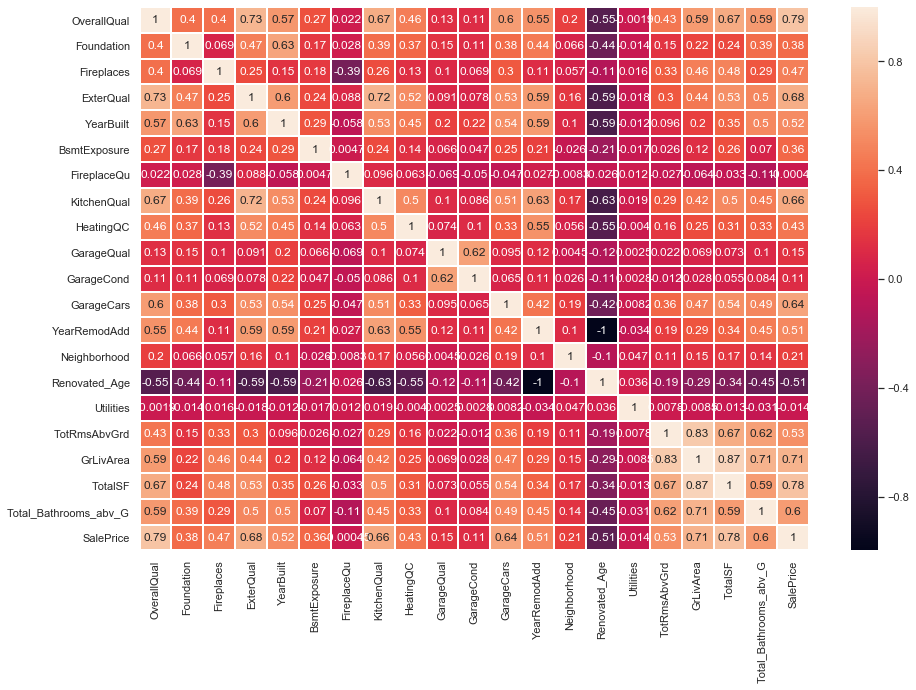

In [1122]:
plt.figure(figsize = (15,10))
seaborn.heatmap(Q1_corr.corr(method = 'pearson'), linewidths= 1, annot = True)

Interesting insights :
Initially, Label encoding was done and it was found that ExterQual was negatively correlated with most of the other varibles.
Then when the exterqual was custom encoded, it gives a better correlation with other variables implying the randomness in Label encoding

From the above heatmap, we can deduce the following positive correlations:
OverallQual is positively correlated to SalePRice, TotalSF, GrLivArea, GarageCars, YearRemodelled.
The Fireplaces is highly corelated with TotalSF and GrLivArea giving a logical conclusion that higher the Sqft, more are the number of fireplaces.
WE can also see that the Garagecars is highly correlated with YearBuilt which means, an increase in Year means, more garage space was needed.
GarageCars was negatively corelated with Utilites.



When it comes to poor corelation, heating quality and garage quality are poorly correlated.
The utilities column is poorly correlated to almost all other columns.
The fireplace column in poorly correlated with all other columns



From the heatmap, we can say that the Renovated_Age(No of years after renovation) has a negative correlation to most of the other variables like OverallQual, Saleprice, ExterQual, Foundation. This means that, as the age increases, the overall quality at the time of being sold has been decreasing.




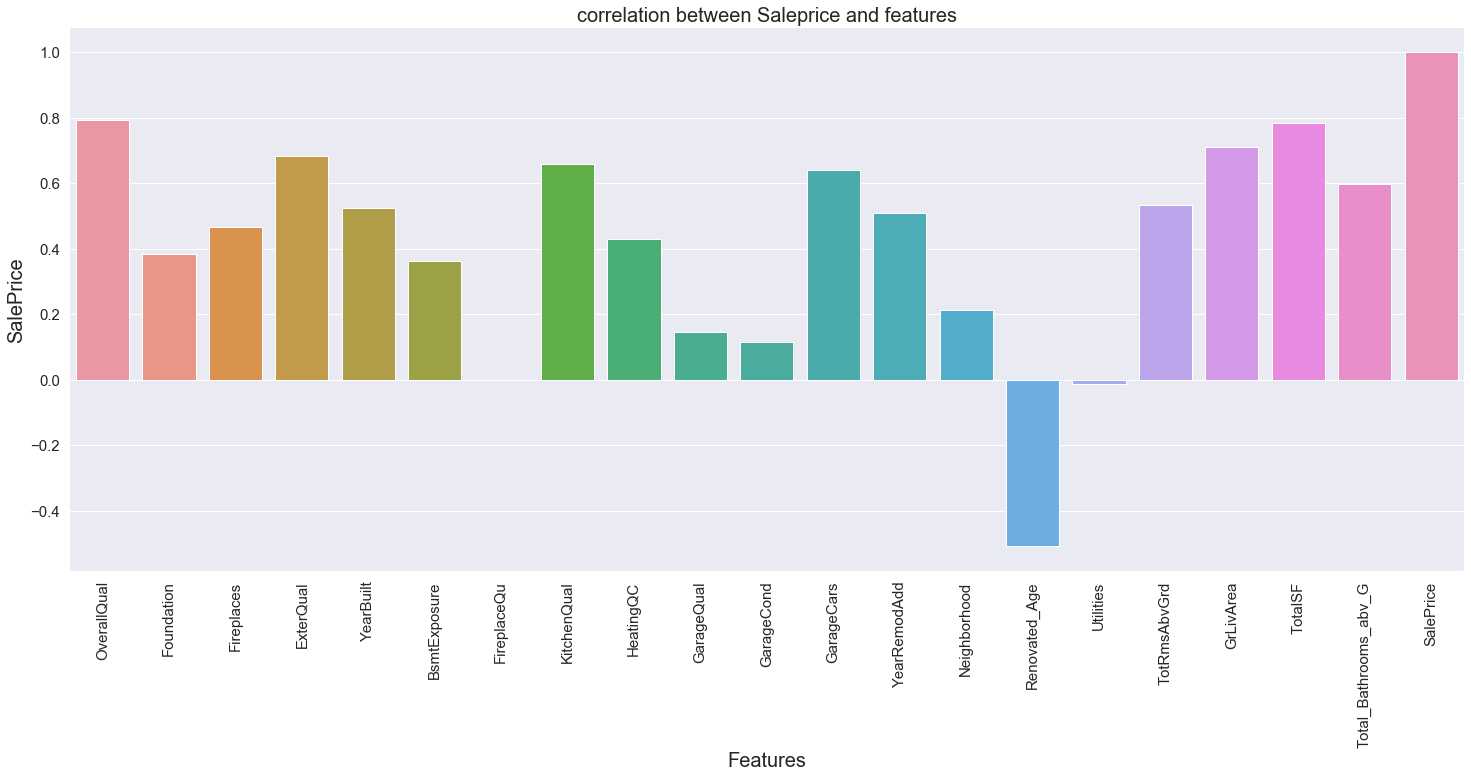

In [916]:
plt.figure(figsize = (25,10))
plt.xticks(rotation = 90)
corr1 = corr.loc['SalePrice', :].to_frame()
b = seaborn.barplot(x=corr1.index, y="SalePrice", data=corr1)
b.axes.set_title("correlation between Saleprice and features",fontsize=20)
b.set_xlabel("Features",fontsize=20)
b.set_ylabel("SalePrice",fontsize=20)
b.tick_params(labelsize=15)


AS the target variable is SalePrice, I have plotted a bar plot signifying the correlations.

The above heatmap shows that the SalePrice is highly correlated with the overall Quality and the TotalSF Area followed by GrlivArea and Garagecars.

It is negatively correalted with Renovated_age(age of the house after renovation) , The external quality, the MSZoning etc.

## Part 2 - Informative Plots

In [691]:
Q2 = Q1_corr.copy(deep = True)
Price = Q2['SalePrice'].groupby('YrSold').min().to_frame(name = 'Min')
Price['Max'] = Q2['SalePrice'].groupby('YrSold').max()
Price['Median'] = Q2['SalePrice'].groupby('YrSold').median()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025F15D696A0>,
      dtype=object)

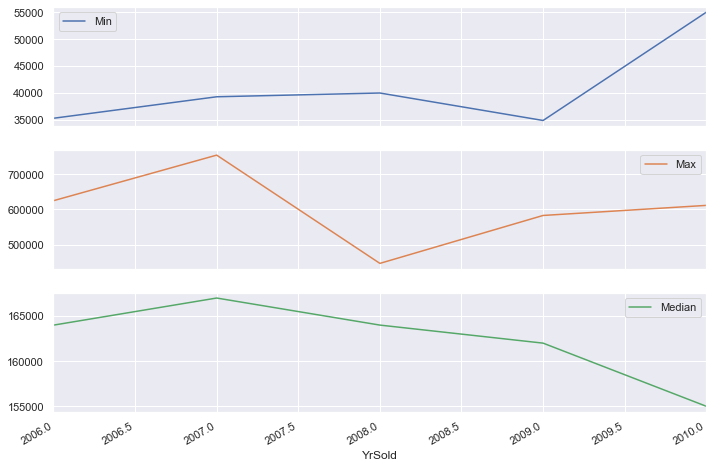

In [694]:
Price.plot.line(subplots = True)

From the above plot, we can see that the median value of Sale price of the houses have fell steeply after 2007 until 2009, exactly at the time the financial crisis had happened. This plot points the occurence of some event for the fall in the prices

In [917]:
Q2 = train.copy(deep = True)

In [918]:
from  matplotlib import pyplot
import seaborn
seaborn.set(style='ticks')



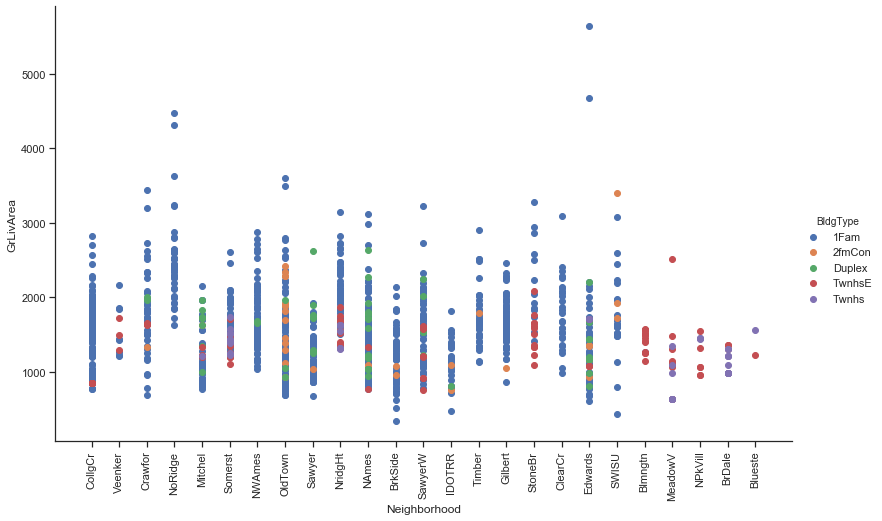

In [936]:

fg = seaborn.FacetGrid(data=Q2, hue= 'BldgType', height=8, aspect=1.5,  gridspec_kws={"wspace":0.4})
plt.xticks(rotation = 90)
ax =fg.map(pyplot.scatter,  'Neighborhood', 'GrLivArea').add_legend()


The above plot shows that the Bloomington has only Townhouse End units and No ridge, CollgCr has only 1Fam houses. Sawyer and NAmes have majority duplexes.

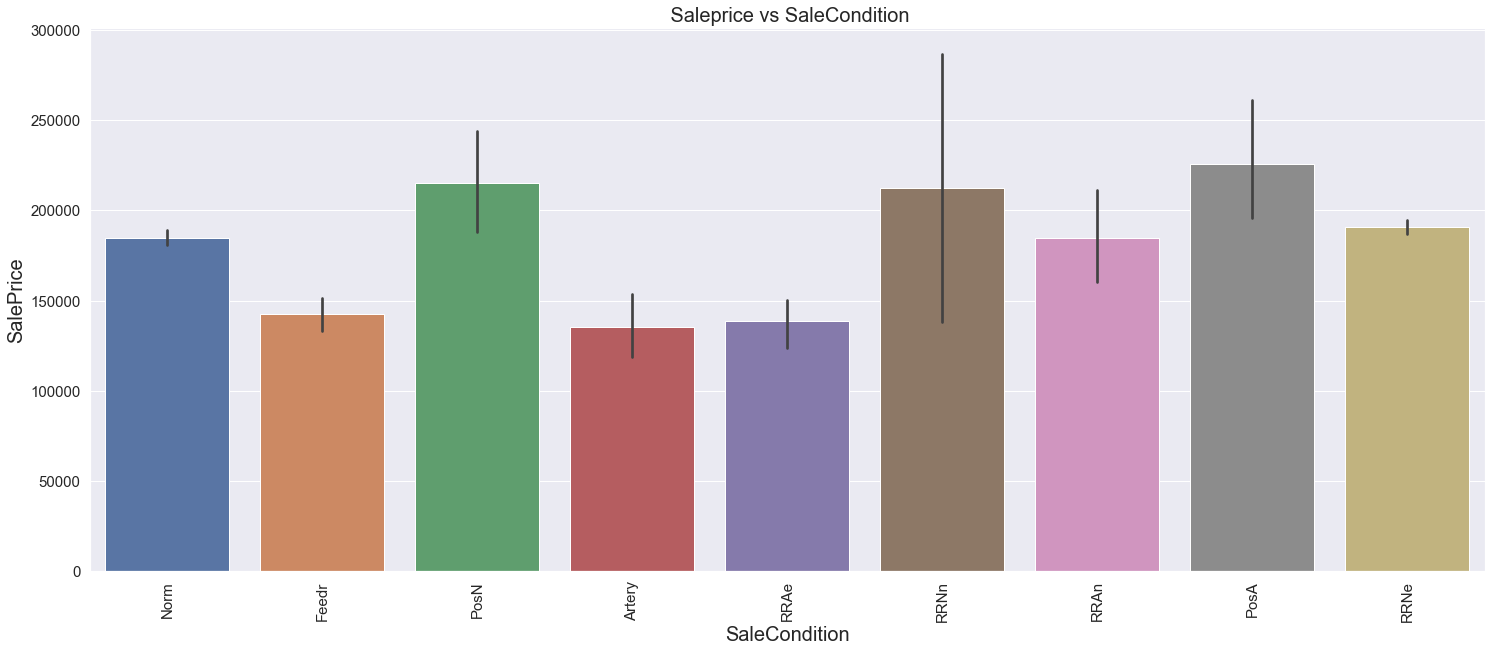

In [952]:
plt.figure(figsize = (25,10))
plt.xticks(rotation = 90)
b = seaborn.barplot(x='Condition1', y= 'SalePrice', data=Q2)
b.axes.set_title(" Saleprice vs SaleCondition",fontsize=20)
b.set_xlabel("SaleCondition",fontsize=20)
b.set_ylabel("SalePrice",fontsize=20)
b.tick_params(labelsize=15)


The houses adjacent to the north-south railroad(RRAn) has a lesser mean price when compared the houses 200' within the North south railroad(RRNn). 

Arterial street and Feedr streets have same advantages as the houses adjacent to them have similar prices.

The houses adjacent to the north-south railroad(RRAne) has a significantly lesser mean price when compared the houses 200' within the North south railroad(RRNe).

PosA, PosN houses, the ones adjacent to positive off-site features have similar prices.

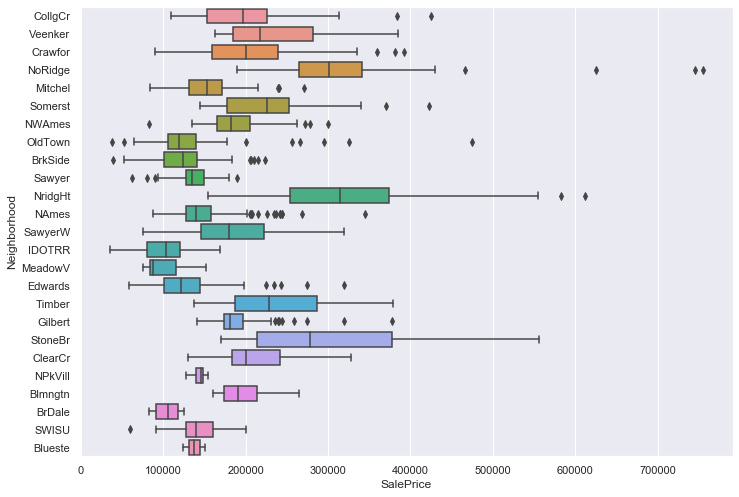

In [88]:
seaborn.set(rc={'figure.figsize':(11.7,8.27)})
seaborn.boxplot(x='SalePrice', y="Neighborhood", data= train)


The above plot gives how saleprice varies for each Neighborhood. That NRidgHeights, StoneBrook neighborhoods are the ones where there are multiple sections of people of living as the housing prices vary significantly.

Also, The neighborhood NoRidge has houses the highest sale price.
The ClearCr has the median very closer to the 25th Quartile which means majority of the houses lie in that spectrum

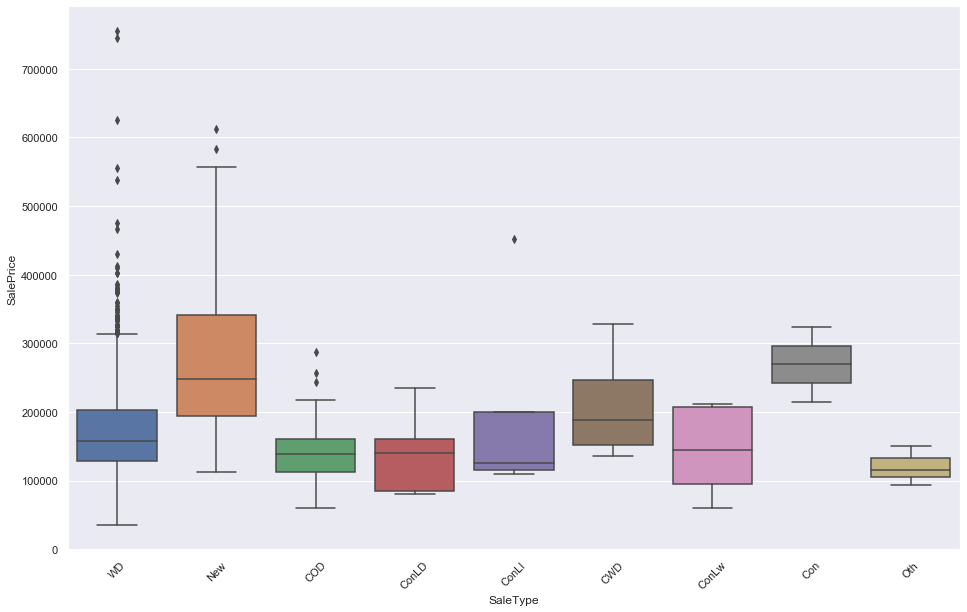

In [1285]:
f, ax = plt.subplots(figsize=(16, 10))
fig = seaborn.boxplot(x="SaleType", y="SalePrice", data=train)
xt = plt.xticks(rotation=45)


saletype wd has highest sale price 
and houses with sale type new always have a price greater than 20000

## Part 3 - Handcrafted Scoring Function

In [953]:
Q3 =  train[[  'Foundation', 'Fireplaces', 'ExterQual',
         'GarageCars' , 'MSZoning' , 'CentralAir', 'LotFrontage',
            'TotRmsAbvGrd', 'GrLivArea',  'SalePrice',  'Electrical',
             'Street', 'LandContour', 'Utilities', 'OverallQual', 'PoolArea',  'BsmtCond' , 'KitchenQual', 'GarageQual', 'RoofStyle', 'HeatingQC']]

In [954]:
Q3['Renovated_Age'] =train['YrSold']-  train['YearRemodAdd'] 
Q3['Total_Bathrooms'] = train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath'])
Q3['TotalSF']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
Q3['total_porch_area'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch'] 

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [955]:
cont_features = ['LotFrontage']
cont_imputer = preprocessing.Imputer(strategy = 'median')
Q3[cont_features] = cont_imputer.fit_transform(Q3[cont_features])

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Laptop\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [956]:
cate_features = [ 'BsmtCond','GarageQual', 'Electrical']
Q3[cate_features] = Q3[cate_features].fillna(Q3[cate_features].mode().iloc[0])

C:\Users\Laptop\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [981]:
def Foundation_Score(item):
    if(item == 'CBlock'):
        return 10
    if(item == 'Slab' ):
        return 10
    if(item == 'PConc'):
        return 10
    if(item == 'Stone'):
        return 8
    if(item == 'BrkTil'):
        return 7
    if(item == 'Wood'):
        return 6

def SalePrice_Score(item):
    
    
    if(item < Q3['SalePrice'].quantile(0.25) ):
        return 6
    
    if(item > Q3['SalePrice'].quantile(0.75) ):
        return 2
        
    else:
        return 10

def Renovated_Age_Score(item):
    if(item < Q3['Renovated_Age'].quantile(0.25)):
        return 10
    if(item < Q3['Renovated_Age'].quantile(0.5)):
        return 6
    else:
        return 2

def MSZoning_Score(item):
    if(item == 'RM'):
        return 10
    if(item == 'RP'):
        return 9
    if(item == 'RH'):
        return 8
    if(item == 'C'):
        return 7
    if(item == 'I'):
        return 6
    if(item == 'RL'):
        return 5
    if(item == 'FV'):
        return 4
    else:
        return 3

def CentralAir_Score(item):
    if(item =='Y'):
        return 10
    else:
        return 0

def Street_Score(item):
    if(item =='Pave'):
        return 10
    else:
        return 0
    
def Electrical_Score(item):
    if(item == 'SBrkr'):
        return 5
    if(item ==  'FuseA'):
        return 4
    if(item ==  'FuseF'):
        return 3
    if(item ==  'FuseP'):
        return 2
    if(item ==  'Mix'):
        return 1

def LandContour_Score(item):
     if(item == 'Lvl'):
        return 4
     if(item == 'BnK'):
        return 3
     if(item == 'HLS'):
        return 2
     else:
        return 1
     
def Utilities_Score(item):
    if(item =='AllPub'):
        return 10
    else:
        return 5


def TotalSF_Score(item):
    if(item < 2000):
        return 6
    if(item > 3000):
        return 10
    else:
        return 8

def GrLivArea_Score(item):
    if(item < Q3['GrLivArea'].quantile(0.25) ):
        return 6
    
    if(item < 2500):
        return 10
        
    else:
        return 8 
       
def RoofStyle_Score(item):
    if(item == 'Gable'):
        return 9
    if(item == 'Hip'):
        return 10
    if(item == 'Gambrel'):
        return 5
    if(item == 'Mansard'):
        return 5
    if(item == 'Flat'):
        return 3
    if(item == 'Shed'):
        return 1

In [982]:
 Q3['Desirability'] =( 9* (Q3['Foundation'].apply(Foundation_Score))+ 5*  Q3['Fireplaces'] + 8 * (Q3['SalePrice'].apply(SalePrice_Score))+ Q3['GarageCars']
                     + 7*  Q3['MSZoning'].apply(MSZoning_Score) + 6 * Q3['CentralAir'].apply(CentralAir_Score) +
    6 * Q3['TotRmsAbvGrd'] + Q3['GrLivArea'].apply(GrLivArea_Score) + 7* Q3['Electrical'].apply(Electrical_Score) + 5* Q3['Street'].apply(Street_Score)
    + 8 * Q3['LandContour' ].apply( LandContour_Score) + 9* Q3['Utilities'].apply(Utilities_Score) + 10 * Q3['OverallQual'] 
    +8* Q3['Renovated_Age'].apply(Renovated_Age_Score) + 10*  Q3['RoofStyle'].apply(RoofStyle_Score) + 8*  Q3['TotalSF'].apply(TotalSF_Score))

In [983]:
Q3 = Q3.sort_values(by=['Desirability'],  ascending=False) 
MostDesirable = Q3.head(10)
LeastDesirable = Q3.tail(10)

In [984]:
MostDesirable

,Foundation,Fireplaces,ExterQual,GarageCars,MSZoning,CentralAir,LotFrontage,TotRmsAbvGrd,GrLivArea,SalePrice,...,BsmtCond,KitchenQual,GarageQual,RoofStyle,HeatingQC,Renovated_Age,Total_Bathrooms,TotalSF,total_porch_area,Desirability
1298,PConc,3,Ex,2,RL,Y,313.0,12,5642,160000,...,TA,Ex,TA,Hip,Ex,0,4.5,11752,506,905
523,PConc,1,Ex,3,RL,Y,130.0,11,4676,184750,...,TA,Ex,TA,Hip,Ex,-1,4.5,7814,614,890
465,PConc,1,Gd,2,RM,Y,69.0,6,1414,178740,...,TA,Gd,TA,Hip,Ex,2,2.0,2789,164,874
1304,PConc,0,Gd,2,RM,Y,32.0,7,1708,130000,...,TA,Gd,TA,Gable,Ex,2,2.0,2684,40,865
1088,PConc,0,Gd,2,RM,Y,24.0,7,1709,137500,...,TA,Gd,TA,Gable,Ex,2,2.0,2679,40,865
193,PConc,0,Gd,2,RM,Y,24.0,7,1709,130000,...,TA,Gd,TA,Gable,Ex,2,2.0,2679,40,865
1324,PConc,1,Gd,3,RL,Y,75.0,7,1795,147000,...,TA,Gd,TA,Gable,Ex,0,2.0,3590,49,862
458,PConc,1,TA,1,RM,Y,69.0,7,1666,161000,...,TA,Gd,TA,Hip,Fa,12,1.0,2254,255,857
145,PConc,0,Gd,2,RM,Y,24.0,7,1709,130000,...,TA,Gd,TA,Gable,Ex,0,2.0,2679,40,855
631,PConc,1,Gd,2,RL,Y,34.0,6,1554,209500,...,Gd,Gd,TA,Gable,Ex,1,2.0,3108,229,855


In [985]:
LeastDesirable

,Foundation,Fireplaces,ExterQual,GarageCars,MSZoning,CentralAir,LotFrontage,TotRmsAbvGrd,GrLivArea,SalePrice,...,BsmtCond,KitchenQual,GarageQual,RoofStyle,HeatingQC,Renovated_Age,Total_Bathrooms,TotalSF,total_porch_area,Desirability
1376,BrkTil,0,TA,1,RL,N,52.0,4,790,91000,...,TA,TA,Fa,Gable,TA,58,1.0,1558,141,574
916,CBlock,0,TA,1,C (all),N,50.0,4,480,35311,...,TA,TA,TA,Gable,TA,56,1.0,960,0,564
1380,BrkTil,0,TA,1,RL,N,45.0,5,864,58500,...,Fa,TA,TA,Gable,TA,60,2.0,1728,96,560
620,BrkTil,0,TA,0,RL,N,45.0,5,864,67000,...,TA,TA,TA,Gable,TA,58,2.0,1728,100,559
1100,CBlock,0,TA,1,RL,N,60.0,3,438,60000,...,Fa,Fa,TA,Gable,TA,59,1.0,728,0,541
30,BrkTil,0,TA,1,C (all),N,50.0,6,1317,40000,...,TA,TA,TA,Gambrel,TA,58,1.0,1966,226,540
812,CBlock,0,Fa,2,C (all),N,66.0,4,1044,55993,...,TA,Fa,TA,Hip,TA,58,1.0,1584,0,531
533,Slab,0,Fa,0,RL,N,50.0,2,334,39300,...,TA,Fa,TA,Gable,Fa,57,1.0,334,0,524
1000,Slab,0,TA,2,RL,N,74.0,4,944,82000,...,TA,Fa,TA,Flat,Fa,57,1.0,944,0,522
375,BrkTil,0,Fa,0,RL,N,69.0,4,904,61000,...,Po,Fa,TA,Gable,Gd,59,1.5,1587,0,516


The variables I had used to describe my scoring function are given below: 
['Foundation', 'Fireplaces', 'ExterQual', 'GarageCars', 'MSZoning',
'CentralAir', 'LotFrontage', 'TotRmsAbvGrd', 'GrLivArea', 'SalePrice',
'Electrical', 'Street', 'LandContour', 'Utilities', 'OverallQual',
'PoolArea', 'BsmtCond', 'KitchenQual', 'GarageQual', 'RoofStyle',
'HeatingQC', 'Renovated_Age', 'Total_Bathrooms', 'TotalSF','total_porch_area']




from the above two dataframes, we can see how Most Desirable houses cater to our requirement and least Desirable houses dont. I think the scoring function worked pretty well.

In [1147]:
Q3.iloc[5:7, :].transpose()

,193,1324
Foundation,PConc,PConc
Fireplaces,0,1
ExterQual,Gd,Gd
GarageCars,2,3
MSZoning,RM,RL
CentralAir,Y,Y
LotFrontage,24,75
TotRmsAbvGrd,7,7
GrLivArea,1709,1795
SalePrice,130000,147000


The above dataframe represent houses  193 and 1324. You can see that the house 193 has lesser TOtal SF and porch area. Also, it is renovated 2 years ago and older than the house 1324. Also, the number of fireplaces are lesser with the GrLivArea lesser too. Inspite of it, it has got greater desirability.

The reason is the SalePrice  and the region it is in. The medium density regions have been given more priority as they are assumed to have lesser crime rate than the low density regions.

Therefore, even though the house 1324 offers you more SF and quality, it is less desirable.

So, I beleive that scoring function has function pretty well.

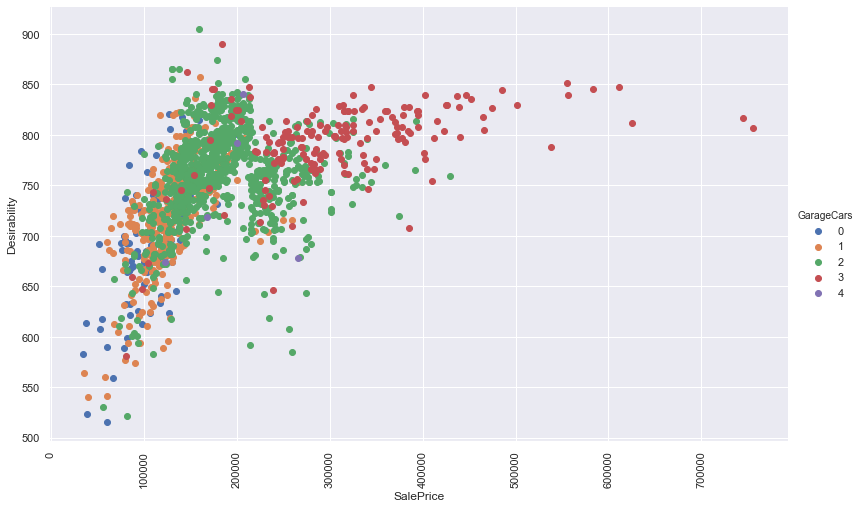

In [1158]:
fg = seaborn.FacetGrid(data=Q3, hue = 'GarageCars', height=8, aspect=1.5,  gridspec_kws={"wspace":0.4})
plt.xticks(rotation = 90)
ax =fg.map(pyplot.scatter, 'SalePrice', 'Desirability' ).add_legend()

From the above plot we can see that ther are majority houses less than 200000$ which are more desirable than others and majority in those have 2 as the number of garage cars as given in defintion

# PairWise Distance Function

In [1159]:
Q4_cate_features = ['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical' ,'FireplaceQu','GarageType'
,'GarageQual','GarageCond' ,'GarageFinish']
train[Q4_cate_features] = train[Q4_cate_features].fillna(train[Q4_cate_features].mode().iloc[0])
test[Q4_cate_features] = test[Q4_cate_features].fillna(test[Q4_cate_features].mode().iloc[0])


Q4_cont_features = ['LotFrontage', 'MasVnrArea' ]
cont_imputer = preprocessing.Imputer(strategy = 'median')
train[Q4_cont_features] = cont_imputer.fit_transform(train[Q4_cont_features])
test[Q4_cont_features] = cont_imputer.transform(test[Q4_cont_features])

train_Q4 = train.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Neighborhood'], axis = 1)
test_Q4 = test.drop(['PoolQC', 'Fence', 'MiscFeature', 'Alley', 'Neighborhood'], axis = 1)


C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [1160]:
train_Q4['Age'] =train['YrSold']-  train['YearBuilt']
train_Q4['Renovated_Age'] =train['YrSold']-  train['YearRemodAdd'] 
train_Q4['Total_Bathrooms'] = train['FullBath'] + (0.5 * train['HalfBath']) + train['BsmtFullBath'] + (0.5 * train['BsmtHalfBath'])
train_Q4['TotalSF']=train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train_Q4['total_porch_area'] = train['WoodDeckSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']
test_Q4['Age'] =test['YrSold']-  test['YearBuilt']
test_Q4['Renovated_Age'] =test['YrSold']-  test['YearRemodAdd'] 
test_Q4['Total_Bathrooms'] = test['FullBath'] + (0.5 * test['HalfBath']) + test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath'])
test_Q4['TotalSF']=test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test_Q4['total_porch_area'] = test['WoodDeckSF'] +test['OpenPorchSF'] + test['EnclosedPorch'] + test['3SsnPorch'] + test['ScreenPorch']

In [1162]:
def Quality_Score(item):
    if(item == 'Ex'):
        return 10
    if(item == 'Gd'):
        return 9
    if(item == 'TA'  or item == 'Av'):
        return 8
    if(item == 'Fa' or item == 'Mn'):
        return 7
    if(item == 'Po'  or item == 'No'):
        return 6
    if(item == 'NA'  or item == 'No'):
        return 5
def LotShape_Score(item):
    if(item == 'Reg'):
        return 10
    if(item == 'IR1'):
        return 9
    if(item == 'IR2'):
        return 8
    if(item == 'IR3'):
        return 7
def LandSlope_Score(item):
    if(item == 'Gtl'):
        return 10
    if(item == 'Mod'):
        return 9
    if(item == 'Sev'):
        return 8
  
        
def Exterior(item):
    if(item == 'AsbShng'):
        return 12
    if(item == 'AsphShn'):
        return 13
    if(item == 'BrkComm'):
        return 8
    if(item == 'BrkFace'):
        return 9
    if(item == 'CBlock'):
        return 15
    if(item == 'CemntBd'):
        return 10
    if(item == 'MetalSd'):
        return 20
    if(item == 'VinylSd'):
        return 7
    if(item == 'Wd Sdng'):
        return 10
    if(item == 'WdShing'):
        return 9
    if(item == 'Stone'):
        return 6
    if(item == 'ImStucc'):
        return 7.5
    if(item == 'Stucco'):
        return 3
    if(item == 'Other'):
        return 5
    if(item == 'HdBoard'):
        return 9
    if(item == 'Plywood'):
        return 7.5
    if(item == 'PreCast'):
        return 5

def PavedDrive_Score(item):
    if(item == 'Y'):
        return 10
    if(item == 'P'):
        return 9
    if(item == 'N'):
        return 8

def GarageFinish_Score(item):
    if(item == 'Fin'):
        return 10
    if(item == 'RFn'):
        return 9
    if(item == 'Unf'):
        return 8
    if(item == 'NA'):
        return 7

def Functional_Score(item):
    if(item == 'Typ'):
        return 10
    if(item == 'Min1'):
        return 9
    if(item == 'Min2'):
        return 7
    if(item == 'Mod'):
        return 5
    if(item == 'Maj1'):
        return 4
    if(item == 'Maj2'):
        return 2
    if(item == 'Sev'):
        return 1
    if(item == 'Sal'):
        return 0

def BsmtFinType_Score(item):
    if(item == 'GLQ'):
        return 6
    if(item == 'ALQ'):
        return 5
    if(item == 'BLQ'):
        return 4
    if(item == 'Rec'):
        return 3
    if(item == 'LwQ'):
        return 2
    if(item == 'Unf'):
        return 1
    if(item == 'NA'):
        return 0

def Condition_Score(item):
    if(item == 'Artery'):
        return 2
    if(item == 'Feedr'):
        return 2
    if(item == 'Norm'):
        return 0
    if(item == 'RRNn'):
        return 5
    if(item ==  'RRAn'):
        return 4
    if(item == 'PosN'):
        return 3
    if(item == 'PosA'):
        return 3
    if(item == 'RRNe'):
        return 5
    if(item == 'RRAe'):
        return 4

def BldgType_Score(item):
    if(item == '1Fam'):
        return 5
    if(item == '2fmCon'):
        return 4
    if(item == 'Duplex'):
        return 3
    if(item == 'TwnhsE'):
        return 2
    if(item == 'Twnhs'):
        return 1

def HouseStyle_Score(item):
    if(item =='1Story'):
        return 1
    if(item == '1.5Fin'):
        return 2.5
    if(item == '1.5Unf'):
        return 1.5
    if(item == '2Story'):
        return 2
    if(item == '2.5Fin'):
        return 3.5
    if(item == '2.5Unf'):
        return 2.5
    if(item == 'SFoyer'):
        return 3
    if(item ==  'SLvl'):
        return 3
def SaleType_Score(item):
    if(item =='WD'):
        return 10
    if(item == 'CWD'):
        return 9
    if(item == 'VWD'):
        return 8
    if(item == 'New'):
        return 7
    if(item == 'COD'):
        return 6
    if(item ==  'Con'):
        return 5
    if(item == 'ConLw'):
        return 4
    if(item ==   'ConLI'):
        return 3
    if(item ==  'ConLD'):
        return 2
    if(item == 'Oth'):
        return 5      

In [1163]:
QCfeatures = ['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'KitchenQual','HeatingQC', 'GarageQual', 'GarageCond' ]
for item in QCfeatures:
    train_Q4[item + '_Numeric'] = train_Q4[item].apply(Quality_Score)
    test_Q4[item + '_Numeric'] = test_Q4[item].apply(Quality_Score)
    
train1_Q4 = train_Q4.drop(QCfeatures, axis = 1)
test1_Q4 = test_Q4.drop(QCfeatures, axis = 1)

In [1164]:
train1_Q4['Foundation']=train1_Q4['Foundation'].apply(Foundation_Score)
train1_Q4['Electrical'] =train1_Q4['Electrical'].apply(Electrical_Score) 
train1_Q4['LandContour' ] = train1_Q4['LandContour' ].apply( LandContour_Score)  
train1_Q4['Utilities']= train1_Q4['Utilities'].apply(Utilities_Score)
train1_Q4['RoofStyle'] = train1_Q4['RoofStyle'].apply(RoofStyle_Score)
train1_Q4['Street'] =  train1_Q4['Street'].apply(Street_Score)
train1_Q4['LotShape'] = train1_Q4['LotShape'].apply(LotShape_Score)
train1_Q4['Exterior1st'] = train1_Q4['Exterior1st'].apply(Exterior)
train1_Q4['Exterior2nd'] = train1_Q4['Exterior2nd'].apply(Exterior)
train1_Q4['LandSlope'] = train1_Q4['LandSlope'].apply(LandSlope_Score)
train1_Q4['PavedDrive']= train1_Q4['PavedDrive'].apply(PavedDrive_Score) 
train1_Q4['BsmtFinType2'] = train1_Q4['BsmtFinType2'].apply(BsmtFinType_Score)
train1_Q4['BsmtFinType1'] = train1_Q4['BsmtFinType1'].apply(BsmtFinType_Score)
train1_Q4['Functional'] = train1_Q4['Functional'].apply(Functional_Score)
train1_Q4['GarageFinish']=train1_Q4['GarageFinish'].apply(GarageFinish_Score)
train1_Q4['Condition1'] = train1_Q4['Condition1'].apply(Condition_Score)
train1_Q4['Condition2'] =train1_Q4['Condition2'].apply(Condition_Score)
train1_Q4['BldgType'] = train1_Q4['BldgType'].apply( BldgType_Score)
train1_Q4['HouseStyle'] =train1_Q4['HouseStyle'].apply(HouseStyle_Score)
train1_Q4['SaleType'] = train1_Q4['SaleType'].apply(SaleType_Score)
train1_Q4['MSSubClass'] = train1_Q4['MSSubClass']/10

In [1165]:
test1_Q4['Foundation']=test1_Q4['Foundation'].apply(Foundation_Score)
test1_Q4['Electrical'] =test1_Q4['Electrical'].apply(Electrical_Score) 
test1_Q4['LandContour' ] = test1_Q4['LandContour' ].apply( LandContour_Score)  
test1_Q4['Utilities']= test1_Q4['Utilities'].apply(Utilities_Score)
test1_Q4['RoofStyle'] = test1_Q4['RoofStyle'].apply(RoofStyle_Score)
test1_Q4['Street'] =  test1_Q4['Street'].apply(Street_Score)
test1_Q4['LotShape'] = test1_Q4['LotShape'].apply(LotShape_Score)
test1_Q4['Exterior1st'] = test1_Q4['Exterior1st'].apply(Exterior)
test1_Q4['Exterior2nd'] = test1_Q4['Exterior2nd'].apply(Exterior)
test1_Q4['LandSlope'] = test1_Q4['LandSlope'].apply(LandSlope_Score)
test1_Q4['PavedDrive']= test1_Q4['PavedDrive'].apply(PavedDrive_Score) 
test1_Q4['BsmtFinType2'] = test1_Q4['BsmtFinType2'].apply(BsmtFinType_Score)
test1_Q4['BsmtFinType1'] = test1_Q4['BsmtFinType1'].apply(BsmtFinType_Score)
test1_Q4['Functional'] = test1_Q4['Functional'].apply(Functional_Score)
test1_Q4['GarageFinish']=test1_Q4['GarageFinish'].apply(GarageFinish_Score)
test1_Q4['Condition1'] = test1_Q4['Condition1'].apply(Condition_Score)
test1_Q4['Condition2'] =test1_Q4['Condition2'].apply(Condition_Score)
test1_Q4['BldgType'] = test1_Q4['BldgType'].apply( BldgType_Score)
test1_Q4['HouseStyle'] =test1_Q4['HouseStyle'].apply(HouseStyle_Score)
test1_Q4['SaleType'] = test1_Q4['SaleType'].apply(SaleType_Score)
test1_Q4['MSSubClass'] = test1_Q4['MSSubClass']/10



In [1166]:
test1_cont_features = ['Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
               'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'Functional','GarageYrBlt','GarageCars','GarageArea','SaleType',   
                 'Total_Bathrooms','TotalSF','KitchenQual_Numeric' ]

cont_imputer1 = preprocessing.Imputer(strategy = 'median')
test1_Q4[test1_cont_features] = cont_imputer.fit_transform(test1_Q4[test1_cont_features])

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [1167]:
test1_Q4['MSZoning'] = test1_Q4['MSZoning'].fillna(test['MSZoning'].mode().iloc[0])

In [1168]:
train1_Q4.select_dtypes(include=["object_"]).columns

Index(['MSZoning', 'LotConfig', 'RoofMatl', 'MasVnrType', 'Heating',
       'CentralAir', 'GarageType', 'SaleCondition'],
      dtype='object')

In [1169]:
def Lab_encoder(item):
    lab_encoder = preprocessing.LabelEncoder()
    lab_encoder.fit(train1_Q4[item])
    train1_Q4[item + '_encoded'] = lab_encoder.transform(train1_Q4[item])
    test1_Q4[item + '_encoded'] = lab_encoder.transform(test1_Q4[item])

In [1170]:
Leftovercols = train1_Q4.select_dtypes(include=["object_"]).columns
for item in Leftovercols:
    Lab_encoder(item)
train1_Q4 = train1_Q4.drop(Leftovercols , axis = 1)
test1_Q4 = test1_Q4.drop(Leftovercols , axis = 1)

In [1171]:
cont_features_Q4 = ['Exterior2nd', 'GarageYrBlt', 'Age', 'Renovated_Age','Total_Bathrooms', 'TotalSF', 'total_porch_area' ]
cont_imputer_Q4 = preprocessing.Imputer(strategy = 'median')
train1_Q4[cont_features_Q4] = cont_imputer_Q4.fit_transform(train1_Q4[cont_features_Q4])

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [1172]:
temp = train1_Q4[['Foundation', 'Electrical','LandContour', 'Utilities', 'RoofStyle', 'Street', 'LotShape','LandSlope', 'SalePrice']]

In [1173]:
temp['LandParameters'] = (train1_Q4['MSSubClass'] + train1_Q4['LotFrontage'] + (train1_Q4['LotArea']/100) + 
train1_Q4['Street'] + train1_Q4['LotShape']+ train1_Q4['LandContour']+ train1_Q4['LandSlope'])

C:\Users\Laptop\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Finding cosine distances

In [1204]:
import numpy as np
from scipy.spatial.distance import cosine

In [1205]:
data = train1_Q4.values
m, k = data.shape

mat = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        if i != j:
            mat[i][j] = cosine(data[i,:], data[j,:])
        else:
            mat[i][j] = 0.
mat = pd.DataFrame(mat)
mat = mat*100000

The below 10 houses are the most similar houses when it is compared to the 0th house based on cosine distance.

In [1206]:
mat.iloc[0, 1:].sort_values().to_frame().head(10)

,0
191,0.356781
138,0.427424
256,0.514578
444,0.568851
315,0.631724
181,0.883560
501,1.035975
832,1.143516
869,1.162471
546,1.237728


In [1207]:
import scipy
euc = scipy.spatial.distance.cdist(train1_Q4.iloc[:,1:], train1_Q4.iloc[:,1:], metric='euclidean', V=None)
euc = pd.DataFrame(euc)



House most similar to the 0th house:

In [1208]:
euc.iloc[0, 1:].sort_values().to_frame().head(25)


,0
256,1161.254064
444,1613.373174
546,1752.482026
507,1799.822352
453,1887.498609
333,2000.510810
216,2013.633408
518,2734.650983
650,2757.754748
924,2912.561416


In [1209]:
seuc = scipy.spatial.distance.cdist(train1_Q4.iloc[:,1:], train1_Q4.iloc[:,1:], metric='seuclidean', V=None)
seuc = pd.DataFrame(seuc)


In [1210]:
seuc.iloc[0, 1:].sort_values().to_frame().head(10)

,0
1240,1.972350
1410,3.049506
670,3.500445
787,3.743833
871,3.837251
1278,3.959523
964,4.117676
1365,4.206873
590,4.254153
937,4.261137


Now, we can see that cosine, euclidean distance gives slightly similar houses to that of the 0th house but seuclidean distance gives very diverse results. To understand more, let us see what happens to the data by considering the most similar house to the 0th house based on cosine and euclidean distances


In [1212]:
check = train1_Q4.iloc[[0,191,256, 1240], :]

In [1213]:
check

,Id,MSSubClass,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,Condition1,...,GarageQual_Numeric,GarageCond_Numeric,MSZoning_encoded,LotConfig_encoded,RoofMatl_encoded,MasVnrType_encoded,Heating_encoded,CentralAir_encoded,GarageType_encoded,SaleCondition_encoded
0,1,6.0,65.0,8450,10,10,4,10,10,0,...,8,8,3,4,1,1,1,1,1,4
191,192,6.0,69.0,7472,10,9,4,10,10,0,...,8,8,3,1,1,1,1,1,1,4
256,257,6.0,64.0,8791,10,9,4,10,10,0,...,8,8,1,4,1,2,1,1,1,4
1240,1241,6.0,65.0,8158,10,10,4,10,10,0,...,8,8,3,4,1,1,1,1,1,4


## Part 5 - Clustering

In [1334]:
def Lab_encoder(item):
    lab_encoder = preprocessing.LabelEncoder()
    lab_encoder.fit(df1[item])
    df1[item ] = lab_encoder.transform(df1[item])

In [1335]:
train_Q5 = pd.read_csv("D:\\data science\\house_prices\\train.csv")
y_train = (train_Q5['SalePrice'])
df = train_Q5.copy(deep = True)
features = ['Alley', 'PoolQC', 'MiscFeature' ,'Fence']
df[features] = df[features].fillna('NA')
cate_features_Q6 = df.select_dtypes(include=["object_"]).columns
df[cate_features_Q6] =df[cate_features_Q6].fillna(df[cate_features_Q6].mode().iloc[0])
cont_features_Q6 = df.select_dtypes(include = ["int64", "float64"]).columns
df[cont_features_Q6] =df[cont_features_Q6].fillna(df[cont_features_Q6].median().iloc[0])
df.fillna(0, inplace = True)


df1 = df.copy(deep=  True)
df1.drop('Neighborhood', axis = 1, inplace = True)
temp =  df1.select_dtypes(include=["object_"]).columns




In [1336]:
for item in temp:
    Lab_encoder(item)

In [1337]:
scaler = preprocessing.StandardScaler()
scaler.fit(df2)
print(scaler.mean_)
print(scaler.scale_)
X_train1 = scaler.transform(df2)
X_train1 = pd.DataFrame(X_train1)

[7.30500000e+02 5.68972603e+01 3.02876712e+00 1.87211986e+02
 1.05168281e+04 9.95890411e-01 9.93835616e-01 1.94246575e+00
 2.77739726e+00 6.84931507e-04 3.01917808e+00 6.23287671e-02
 1.22513699e+01 2.03150685e+00 2.00821918e+00 4.93150685e-01
 3.03835616e+00 6.09931507e+00 5.57534247e+00 1.97126781e+03
 1.98486575e+03 1.41027397e+00 1.07534247e+00 9.62465753e+00
 1.03397260e+01 1.76232877e+00 1.07119863e+02 2.53972603e+00
 3.73356164e+00 1.39657534e+00 2.28013699e+00 2.81712329e+00
 2.28424658e+00 2.78972603e+00 4.43639726e+02 4.71575342e+00
 4.65493151e+01 5.67240411e+02 1.05742945e+03 1.03630137e+00
 1.53835616e+00 9.34931507e-01 3.68219178e+00 1.16262671e+03
 3.46992466e+02 5.84452055e+00 1.51546370e+03 4.25342466e-01
 5.75342466e-02 1.56506849e+00 3.82876712e-01 2.86643836e+00
 1.04657534e+00 2.33972603e+00 6.51780822e+00 5.74931507e+00
 6.13013699e-01 2.38698630e+00 2.20821918e+00 1.90926747e+03
 1.22876712e+00 1.76712329e+00 4.72980137e+02 3.87191781e+00
 3.90547945e+00 1.856164

In [1338]:
import scipy
ary = scipy.spatial.distance.cdist(X_train1.iloc[:,1:], X_train1.iloc[:,1:], metric='euclidean', V=None)
ary = pd.DataFrame(ary)
ary


,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
0,0.000000,9.778168,4.680837,10.347496,7.020805,14.873620,8.147755,12.379471,13.956739,13.816507,...,10.376610,9.162616,7.794224,10.027249,8.168616,5.841110,10.251002,13.007959,11.430446,9.633687
1,9.778168,0.000000,9.487720,12.096514,9.891053,16.836611,8.551765,12.506056,13.536693,13.466758,...,12.664799,10.388405,10.689197,11.186172,10.149038,9.008738,9.154928,14.843502,11.538148,9.277218
2,4.680837,9.487720,0.000000,10.500424,4.744747,14.637141,8.047571,11.264301,13.730838,13.826099,...,10.644098,9.266758,8.366340,10.321226,8.257040,4.921203,10.112708,13.159453,11.902923,10.213880
3,10.347496,12.096514,10.500424,0.000000,11.491188,17.869257,12.464351,12.928707,12.426504,14.531916,...,13.527414,13.198773,11.475767,12.107540,12.445702,10.792995,12.359171,15.976423,13.026043,12.786661
4,7.020805,9.891053,4.744747,11.491188,0.000000,15.846486,7.652868,11.087299,14.582578,15.462060,...,11.906839,9.750115,10.321092,12.248951,9.584059,7.258188,10.786995,14.015200,13.311544,11.176302
5,14.873620,16.836611,14.637141,17.869257,15.846486,0.000000,15.815505,16.588372,19.729343,19.517649,...,17.463223,16.836127,15.943729,16.263969,15.317085,14.912556,17.029519,16.721729,17.325838,16.678042
6,8.147755,8.551765,8.047571,12.464351,7.652868,15.815505,0.000000,12.253605,14.686324,15.142107,...,12.829686,8.141595,10.263175,10.968555,8.201895,8.530657,8.987394,14.412826,12.195148,10.117749
7,12.379471,12.506056,11.264301,12.928707,11.087299,16.588372,12.253605,0.000000,15.875610,16.434870,...,14.352200,13.496189,14.164258,14.905473,13.282546,11.793074,12.286813,14.299025,14.239573,12.101119
8,13.956739,13.536693,13.730838,12.426504,14.582578,19.729343,14.686324,15.875610,0.000000,13.596979,...,13.784662,14.404701,15.121505,13.911043,14.868547,12.719582,12.554030,17.799484,14.440504,14.821536
9,13.816507,13.466758,13.826099,14.531916,15.462060,19.517649,15.142107,16.434870,13.596979,0.000000,...,14.167416,15.613826,13.513667,14.956688,15.029966,13.538910,14.180790,18.022642,15.172569,14.105076


In [1339]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=9, random_state=0).fit(ary)
kmeans.labels_

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
dfx_pca = pca.fit(ary)

In [1340]:
dfx_trans = pca.transform(ary)
dfx_trans = pd.DataFrame(data=dfx_trans)

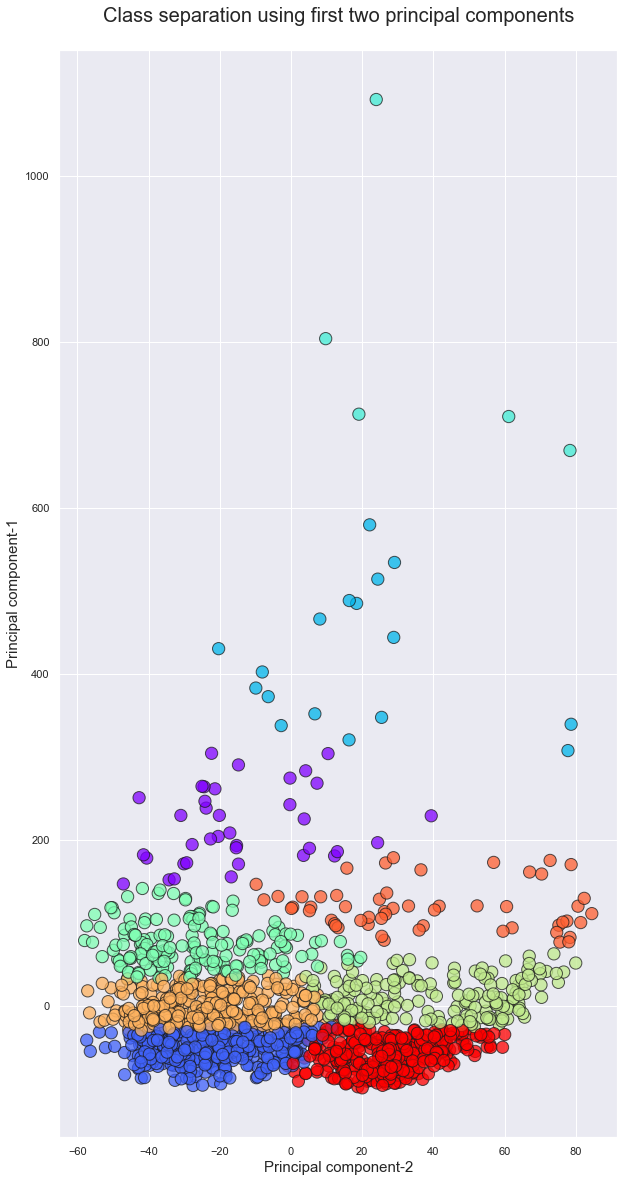

In [1341]:

plt.figure(figsize=(10,20))
plt.scatter(dfx_trans[1],dfx_trans[0], c= kmeans.labels_.astype(float),edgecolors='k',alpha=0.75,s=150, cmap = 'rainbow')

plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-2",fontsize=15)
plt.ylabel("Principal component-1",fontsize=15)

plt.show()

In [1342]:
df['Cluster'] = kmeans.labels_

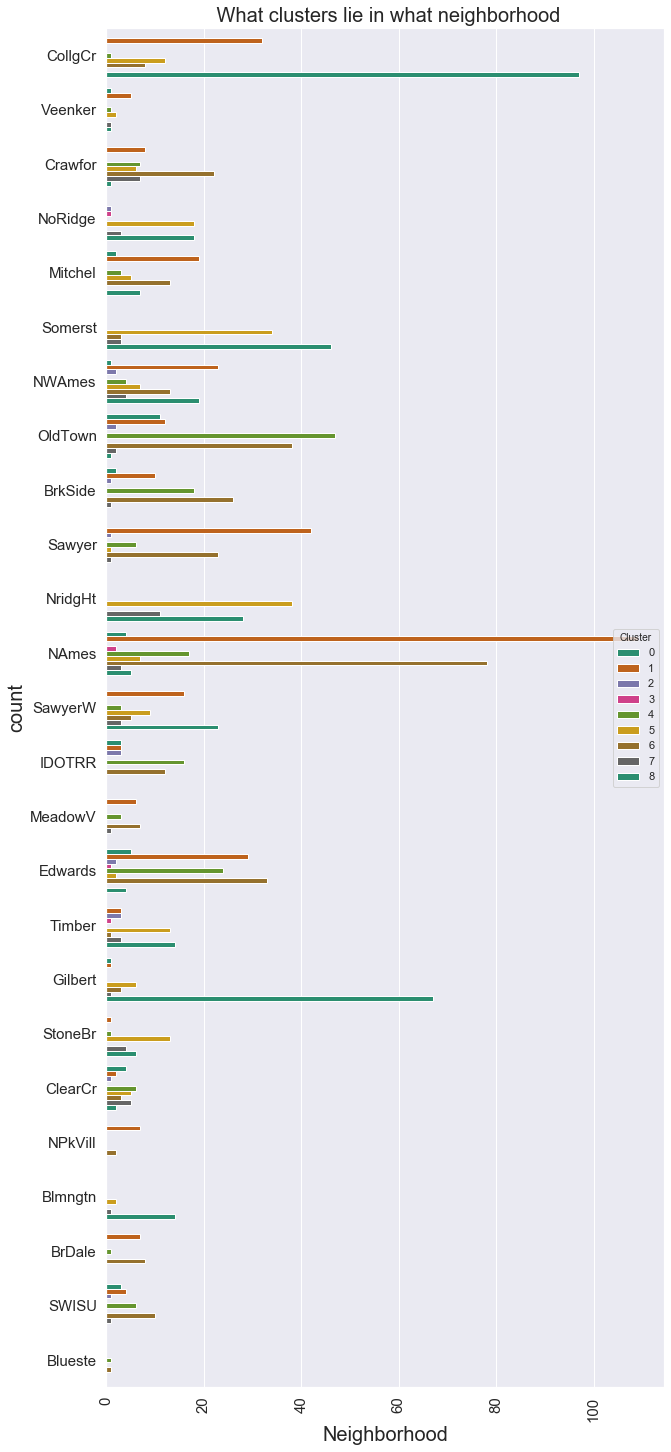

In [1353]:
plt.figure(figsize = (10,25))
b = seaborn.countplot(y="Neighborhood", hue="Cluster", data = df, palette="Dark2")

plt.xticks(rotation = 90)
b.axes.set_title(" What clusters lie in what neighborhood",fontsize=20 )
b.set_xlabel("Neighborhood",fontsize=20)
b.set_ylabel("count",fontsize=20)
b.tick_params(labelsize=15)

We can therefore check what clusters are maximum in each neighborhood. For eg, Most of the houses in NAmes are in the 1st cluster

## Part 6 - Linear Regression
Set up a simple linear regression model on one or more variables to predict the pricing as a function of other variables. How well/badly does it work? Which variable is the most important one?

In [1437]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib import pyplot as plt
from sklearn import tree, model_selection
import numpy as np
from sklearn import linear_model

In [1438]:
train_Q6 = pd.read_csv("D:\\data science\\house_prices\\train.csv")
test = pd.read_csv("D:\\data science\\house_prices\\test.csv")
df = pd.merge(train_Q6, test, how = 'outer')
df = df.drop('SalePrice', axis = 1)
y_train = np.log(train_Q6['SalePrice'])
y_submit =  test['Id']
y_submit = y_submit.to_frame()

In [1439]:
features = ['Alley', 'PoolQC', 'MiscFeature' ,'Fence']
df[features] = df[features].fillna('NA')
cate_features_Q6 = df.select_dtypes(include=["object_"]).columns
df[cate_features_Q6] =df[cate_features_Q6].fillna(df[cate_features_Q6].mode().iloc[0])
cont_features_Q6 = df.select_dtypes(include = ["int64", "float64"]).columns
df[cont_features_Q6] =df[cont_features_Q6].fillna(df[cont_features_Q6].median().iloc[0])
df.fillna(0, inplace = True)

In [1440]:
df1 = df.copy(deep=  True)
df1.drop(['Id','Alley', 'PoolQC', 'PoolArea', 'MiscFeature' ,'Fence', 'MiscVal'], axis = 1, inplace = True)

In [1441]:
def Lab_encoder(item):
    lab_encoder = preprocessing.LabelEncoder()
    lab_encoder.fit(df1[item])
    df1[item ] = lab_encoder.transform(df1[item])

features =  df1.select_dtypes(include=["object_"]).columns
for item in features:
    Lab_encoder(item)

In [1442]:

df2 = df1.copy(deep = True)
CTrain = df2[0:train.shape[0]]
CTest = df2[train.shape[0]:]

In [1406]:
scaler = preprocessing.StandardScaler()
scaler.fit(df2)
print(scaler.mean_)
print(scaler.scale_)
df2 = scaler.transform(df2)
df2 = pd.DataFrame(df2, columns = df1.columns)

[5.71377184e+01 3.00849949e+02 1.01681141e+04 6.08907160e+00
 5.56457691e+00 1.97131278e+03 1.98426447e+03 1.12899966e+02
 4.41772182e+02 5.00654334e+01 5.61080164e+02 1.05191744e+03
 1.15958171e+03 3.36483727e+02 4.69441590e+00 1.50075985e+03
 1.42994176e+00 1.06166495e+00 1.56800274e+00 3.80267215e-01
 2.86022610e+00 1.04453580e+00 6.45152449e+00 5.97122302e-01
 1.94989140e+03 2.26618705e+00 4.73212744e+02 9.37098321e+01
 4.74868106e+01 2.30983213e+01 2.60226105e+00 1.60623501e+01
 6.21308667e+00 2.00779274e+03 3.02774923e+00 9.95889003e-01
 1.94758479e+00 2.77697842e+00 3.42583076e-04 3.05584104e+00
 5.37855430e-02 1.24371360e+01 2.04042480e+00 2.00205550e+00
 5.05652621e-01 3.02672148e+00 1.39636862e+00 1.06303529e+00
 9.62418637e+00 1.03360740e+01 1.76704351e+00 2.53066119e+00
 3.70880439e+00 1.39328537e+00 2.26036314e+00 2.80781089e+00
 2.29941761e+00 2.81980130e+00 4.68722165e+00 1.02535115e+00
 1.53374443e+00 9.32853717e-01 3.68516615e+00 2.34703666e+00
 5.75984926e+00 2.366563

In [1621]:
def fit_model_objective(estimator, grid, X_train, y_train):
    grid_estimator = model_selection.GridSearchCV(estimator, grid, cv=10)

    grid_estimator.fit(X_train, y_train)

    print(grid_estimator.cv_results_)

    print(grid_estimator.best_params_)

    final_model = grid_estimator.best_estimator_

    print(final_model.coef_)

    print(final_model.intercept_)

    print(grid_estimator.best_score_)

    print(grid_estimator.score(X_train, y_train))

    return final_model

In [1623]:
linr_estimator5 = LinearRegression()
finalmodel = fit_model_objective(linr_estimator5, linr_grid, CTrain, y_train)

y_submit['SalePrice'] = np.exp(finalmodel.predict(CTest))
y_submit.to_csv("D:\\data science\\house_prices\\submission10.csv", index=False)


{'mean_fit_time': array([0.01162076, 0.0039892 ]), 'std_fit_time': array([0.01930676, 0.00044596]), 'mean_score_time': array([0.00289617, 0.00119696]), 'std_score_time': array([0.00471958, 0.00039865]), 'param_fit_intercept': masked_array(data=['False', 'True'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'fit_intercept': 'False'}, {'fit_intercept': 'True'}], 'split0_test_score': array([0.88531981, 0.88531981]), 'split1_test_score': array([0.91743262, 0.91743262]), 'split2_test_score': array([0.91706319, 0.91706319]), 'split3_test_score': array([0.807893, 0.807893]), 'split4_test_score': array([0.88464276, 0.88464276]), 'split5_test_score': array([0.89161557, 0.89161557]), 'split6_test_score': array([0.86955313, 0.86955313]), 'split7_test_score': array([0.90503811, 0.90503811]), 'split8_test_score': array([0.57789023, 0.57789023]), 'split9_test_score': array([0.89036574, 0.89036574]), 'mean_test_score': array([0.85468142, 0.85468142])

The grid estimator gives a model with 88.5% accuracy, which is a high value in itself. The intercept is formed at 19.35. The model has overfit giving extremely high values.

In [1626]:
coff = list(finalmodel.coef_)
i = coff.index(max(coff))
CTrain.columns[i]


'Street'

The above code shows that the 'Street_encoded' is the most important variable. 

## Part 7 - External Dataset

No of schools in the neighborhood. Crime rate in the neighborhood. Recession in those years.

In [1647]:
Train7 = CTrain.copy(deep= True)
Test7 = CTest.copy(deep = True)
df = pd.merge(Train7, Test7, how = 'outer')
y_train = np.log(train['SalePrice'])
y_submit =  test['Id']
y_submit = y_submit.to_frame()

In [1648]:
EXD = pd.read_excel("C:\\Users\\Laptop\\Desktop\\USAEConomy.xlsx")

In [1649]:
NewData = df.merge(EXD, how = 'left' , left_on='YrSold', right_on='Year')

In [1650]:
NewData[['Nominal GDP', 'GDP per capita']]=NewData[['Nominal GDP', 'GDP per capita']].astype('int')

In [1651]:
features = ['GDP growth', 'Inflation rate',
       'Unemployment', 'Budget balance',
       'Current account','Government debt held by public','Year']

NewData.drop(features, axis = 1, inplace = True)

In [1652]:
NewData.shape

(2919, 86)

In [1653]:
df2 = NewData.copy(deep = True)
CTrain1 = df2[ :CTrain.shape[0]]
CTest1 = df2[CTrain.shape[0]:]

In [1657]:
linr_estimator7 = LinearRegression()
finalmodel = fit_model_objective(linr_estimator7, linr_grid, CTrain1, y_train)

{'mean_fit_time': array([0.0063827 , 0.00588381]), 'std_fit_time': array([0.00111098, 0.00104194]), 'mean_score_time': array([0.00139639, 0.00169563]), 'std_score_time': array([0.0004881 , 0.00045638]), 'param_fit_intercept': masked_array(data=['False', 'True'],
             mask=[False, False],
       fill_value='?',
            dtype=object), 'params': [{'fit_intercept': 'False'}, {'fit_intercept': 'True'}], 'split0_test_score': array([0.88369204, 0.88369204]), 'split1_test_score': array([0.91743897, 0.91743897]), 'split2_test_score': array([0.91814814, 0.91814814]), 'split3_test_score': array([0.80396306, 0.80396306]), 'split4_test_score': array([0.88477622, 0.88477622]), 'split5_test_score': array([0.89287076, 0.89287076]), 'split6_test_score': array([0.87161032, 0.87161032]), 'split7_test_score': array([0.90488269, 0.90488269]), 'split8_test_score': array([0.53633566, 0.53633566]), 'split9_test_score': array([0.82527019, 0.82527019]), 'mean_test_score': array([0.8438988, 0.8438988

In [1658]:
y_submit['SalePrice'] = np.exp(finalmodel.predict(CTest1))
y_submit.to_csv("D:\\data science\\house_prices\\submission15.csv", index=False)

We can see that the best score for the new model gives an accuracy of greater than 0.2%. The kaggle metric also shows a change of 0.15 
when compared to the original model. Even though there is no significant improvement, the data is actually helped by the EXternal data
set.

# Q8

In [1632]:
train_Q8 = pd.read_csv("D:\\data science\\house_prices\\train.csv")
test = pd.read_csv("D:\\data science\\house_prices\\test.csv")
df = pd.merge(train_Q8, test, how = 'outer')
df = df.drop('SalePrice', axis = 1)
y_train = np.log(train_Q8['SalePrice'])
y_submit =  test['Id']
y_submit = y_submit.to_frame()

In [1633]:
features = ['Alley', 'PoolQC', 'MiscFeature' ,'Fence']
df[features] = df[features].fillna('NA')
cate_features_Q6 = df.select_dtypes(include=["object_"]).columns
df[cate_features_Q6] =df[cate_features_Q6].fillna(df[cate_features_Q6].mode().iloc[0])
cont_features_Q6 = df.select_dtypes(include = ["int64", "float64"]).columns
df[cont_features_Q6] =df[cont_features_Q6].fillna(df[cont_features_Q6].median().iloc[0])
df.fillna(0, inplace = True)


In [1634]:
def Lab_encoder(item):
    lab_encoder = preprocessing.LabelEncoder()
    lab_encoder.fit(df1[item])
    df1[item ] = lab_encoder.transform(df1[item])

df1 = df.copy(deep = True)
features =  df1.select_dtypes(include=["object_"]).columns
for item in features:
    Lab_encoder(item)

df1['Renovated_Age'] =df1['YrSold']-  df1['YearRemodAdd'] 
df1['Total_Bathrooms'] = df1['FullBath'] + (0.5 * df1['HalfBath']) + df1['BsmtFullBath'] + (0.5 * df1['BsmtHalfBath'])
df1['TotalSF']=df1['TotalBsmtSF'] + df1['1stFlrSF'] + df1['2ndFlrSF']
df1['total_porch_area'] = df1['WoodDeckSF'] + df1['OpenPorchSF'] + df1['EnclosedPorch'] + df1['3SsnPorch'] + df1['ScreenPorch'] 


In [1635]:
df2 = df1.copy(deep = True)
CTrain = df2[0:train.shape[0]]
CTest = df2[train.shape[0]:]

In [1636]:

def Linear_Models(item):
    linr_estimator5 = LinearRegression()
    linr_estimator5.fit(CTrain[[item]], y_train)
    y_submit['SalePrice' + item] = np.exp(linr_estimator5.predict(CTest[[item]]))
    


In [1637]:
features = ['OverallQual', 'Neighborhood',  'GrLivArea', 'YrSold', 'Renovated_Age',  'ExterQual',
       'Fence', 'MiscFeature', 'MiscVal', 'Utilities','Id']

In [1638]:
for item in features:
    Linear_Models(item)

In [1639]:
from sklearn.feature_selection import f_regression

In [1640]:
f_regression(CTrain[features], train['SalePrice'] )[1].round(3)

array([0.   , 0.   , 0.   , 0.269, 0.   , 0.   , 0.   , 0.011, 0.418,
       0.585, 0.403])

In [1641]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

In [1222]:
X = CTrain[features] 
y = train['SalePrice']
s=len(features)
svm = SVC(kernel='linear')
cv = StratifiedKFold(2)
for item in features:
    X = CTrain[[item]]
    y = train('SalePrice')
    meansq=mean_squared_error(X, y)
    score, permutation_scores, pvalue = permutation_test_score(svm ,X, y, scoring="accuracy", cv=cv, n_permutations=100, n_jobs=1)
    print(" (pvalue : %s)" % ( pvalue))

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. Th

In [1642]:
from sklearn.metrics import make_scorer

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. Th

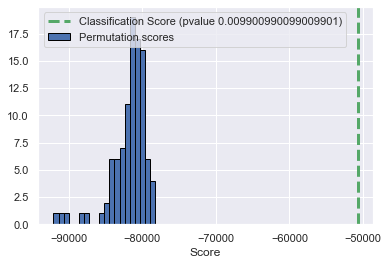

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=2.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. Th

In [ ]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y_pred - y)**2))

rmse_scorer = make_scorer(rmse, greater_is_better=False)
   

cv = StratifiedKFold(2)

for item in features:
    X = CTrain[[item]]
    y = train['SalePrice']
    
    score, permutation_scores, pvalue = permutation_test_score(svm,X, y, scoring=rmse_scorer, cv=cv, n_permutations=100, n_jobs=1)
    plt.hist(permutation_scores, 20, label='Permutation scores',
             edgecolor='black')
    ylim = plt.ylim()
    plt.plot(2 * [score], ylim, '--g', linewidth=3,
             label='Classification Score'
             ' (pvalue %s)' % pvalue)
   
    plt.ylim(ylim)
    plt.legend()
    plt.xlabel('Score')
    plt.show()

In [1435]:
X = CTrain[features]
X = sm.add_constant(X) # adding a constant

model = sm.OLS(train['SalePrice'], X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     388.4
Date:                Tue, 22 Oct 2019   Prob (F-statistic):               0.00
Time:                        07:19:58   Log-Likelihood:                -17541.
No. Observations:                1460   AIC:                         3.511e+04
Df Residuals:                    1448   BIC:                         3.517e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.235e+06    1.6e+06      0.772

In [ ]:
The RMSE function has been taking a lot of time coz of 100 permutations. Therefore, I have used other methods too to calculate Pvals
The Pvals have been calculated from various methods. All the three methods show same pattern in the P values. The Pval for OverallQual,
REnovatedage, ExterQual, GrLivArea is zero which means none of the single value regression models build give values by luck. However, 
variables like YrSold, Fence, MiscFeature, MisVal give higher Pvals implying no significant contribution or that the value of target column
obtained can be because of luck

# Q9

In [1229]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from matplotlib import pyplot as plt
from sklearn import tree, model_selection
import numpy as np
from sklearn import linear_model

In [1268]:
train_Q6 = pd.read_csv("D:\\data science\\house_prices\\train.csv")
test = pd.read_csv("D:\\data science\\house_prices\\test.csv")
df = pd.merge(train_Q6, test, how = 'outer')
df = df.drop('SalePrice', axis = 1)
y_train = np.log(train_Q6['SalePrice'])
y_submit =  test['Id']
y_submit = y_submit.to_frame()

In [1269]:
features = ['Alley', 'PoolQC', 'MiscFeature' ,'Fence']
df[features] = df[features].fillna('NA')
cate_features_Q6 = df.select_dtypes(include=["object_"]).columns
df[cate_features_Q6] =df[cate_features_Q6].fillna(df[cate_features_Q6].mode().iloc[0])
cont_features_Q6 = df.select_dtypes(include = ["int64", "float64"]).columns
df[cont_features_Q6] =df[cont_features_Q6].fillna(df[cont_features_Q6].median().iloc[0])
df.fillna(0, inplace = True)

In [1270]:
df1 = df.copy(deep=  True)

df1.drop(['Id','Alley', 'PoolQC', 'PoolArea', 'MiscFeature' ,'Fence', 'MiscVal'], axis = 1, inplace = True)

In [1274]:
df2 = pd.get_dummies(df1)
CTrain = df2[0:train.shape[0]]
CTest = df2[train.shape[0]:]

In [ ]:
def fit_model_objective(estimator, grid, X_train, y_train):
    grid_estimator = model_selection.GridSearchCV(estimator, grid, cv=10)

    grid_estimator.fit(X_train, y_train)

    print(grid_estimator.cv_results_)

    print(grid_estimator.best_params_)

    final_model = grid_estimator.best_estimator_

    print(final_model.coef_)

    print(final_model.intercept_)

    print(grid_estimator.best_score_)

    print(grid_estimator.score(X_train, y_train))

    return final_model

In [1277]:
ridge_estimator = linear_model.Ridge()
ridge_grid = {'alpha':[0.1,0.5,1.0]}
final_model2 = fit_model_objective(ridge_estimator, ridge_grid, CTrain, y_train)


{'mean_fit_time': array([0.03231356, 0.00648401, 0.00578644]), 'std_fit_time': array([0.07533936, 0.00080414, 0.00059836]), 'mean_score_time': array([0.00179338, 0.00129538, 0.0011951 ]), 'std_score_time': array([0.00086938, 0.00045765, 0.00039887]), 'param_alpha': masked_array(data=[0.1, 0.5, 1.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 0.5}, {'alpha': 1.0}], 'split0_test_score': array([0.88884036, 0.89055502, 0.89101837]), 'split1_test_score': array([0.90256373, 0.90255546, 0.90247381]), 'split2_test_score': array([0.91274163, 0.9116038 , 0.91117935]), 'split3_test_score': array([0.81708876, 0.81579188, 0.81537301]), 'split4_test_score': array([0.89371763, 0.89256602, 0.89218525]), 'split5_test_score': array([0.88121489, 0.88318218, 0.88349225]), 'split6_test_score': array([0.87817474, 0.87827693, 0.87829292]), 'split7_test_score': array([0.89466535, 0.89350384, 0.89312619]), 'split8_test_score':

In [1278]:
y_submit['SalePrice'] = np.exp(final_model2.predict(CTest))
y_submit.to_csv("D:\\data science\\house_prices\\submission2.csv",  index=False)

In [1279]:
lasso_estimator = linear_model.Lasso()
lasso_grid = {'alpha':[0.1,0.5,1.0]}
final_model3 = fit_model_objective(lasso_estimator, lasso_grid, CTrain, y_train)


{'mean_fit_time': array([0.00847862, 0.00728204, 0.00787909]), 'std_fit_time': array([0.0012833 , 0.00126496, 0.00129642]), 'mean_score_time': array([0.00159504, 0.00139456, 0.00149565]), 'std_score_time': array([0.00048861, 0.00048824, 0.00049863]), 'param_alpha': masked_array(data=[0.1, 0.5, 1.0],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1}, {'alpha': 0.5}, {'alpha': 1.0}], 'split0_test_score': array([ 0.70013054, -0.00551596, -0.00551596]), 'split1_test_score': array([ 0.6900487 , -0.01732281, -0.01732281]), 'split2_test_score': array([ 6.87156905e-01, -8.19012487e-05, -8.19012487e-05]), 'split3_test_score': array([ 6.76967867e-01, -4.95982318e-05, -4.95982318e-05]), 'split4_test_score': array([ 6.76355789e-01, -3.95292753e-05, -3.95292753e-05]), 'split5_test_score': array([ 0.70952798, -0.00551315, -0.00551315]), 'split6_test_score': array([ 0.71340893, -0.00999037, -0.00999037]), 'split7_test_score': array([ 

In [1280]:
y_submit['SalePrice'] = np.exp(final_model3.predict(CTest))
y_submit.to_csv("D:\\data science\\house_prices\\submission3.csv",  index=False)


In [1281]:
enet_estimator = linear_model.ElasticNet()
enet_grid = {'alpha':[0.1,0.5], 'l1_ratio':[0.1,0.2,0.5]}
final_model4 = fit_model_objective(enet_estimator, enet_grid, X_train2, y_train)

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.431770635869956, tolerance: 0.021187322042519895
  positive)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.065422856117088, tolerance: 0.02100187174002019
  positive)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4318982502715834, tolerance: 0.02064938326724111
  positive)
C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. D

{'mean_fit_time': array([0.09055734, 0.08965969, 0.08896217, 0.09025874, 0.07110987,
       0.03590391]), 'std_fit_time': array([0.01084214, 0.01092967, 0.00438845, 0.0104433 , 0.01530867,
       0.00406347]), 'mean_score_time': array([0.00119772, 0.00109742, 0.00109723, 0.00119817, 0.00109839,
       0.00079782]), 'std_score_time': array([0.00039842, 0.0002993 , 0.00053703, 0.00039877, 0.00029821,
       0.00039891]), 'param_alpha': masked_array(data=[0.1, 0.1, 0.1, 0.5, 0.5, 0.5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_l1_ratio': masked_array(data=[0.1, 0.2, 0.5, 0.1, 0.2, 0.5],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.1, 'l1_ratio': 0.1}, {'alpha': 0.1, 'l1_ratio': 0.2}, {'alpha': 0.1, 'l1_ratio': 0.5}, {'alpha': 0.5, 'l1_ratio': 0.1}, {'alpha': 0.5, 'l1_ratio': 0.2}, {'alpha': 0.5, 'l1_ratio': 0.5}], 'split0_te

C:\Users\Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5913992403967825, tolerance: 0.02328006589886511
  positive)


In [1436]:
y_submit['SalePrice'] = np.exp(final_model4.predict(C_test2))
y_submit.to_csv("D:\\data science\\house_prices\\submission4.csv", index=False)


I performed Lasso, ridge, Elastic Net on the dataframe. I found that the elastic net performed the best as it limits the limitations of Lasso.
WE see a number of highly corelated variables and therefore, I believe that ElasticNet performs better.

# Kaggle Link: https://www.kaggle.com/pirateking511

Highest Rank: 2752
score : 0.14316
No of entries :17

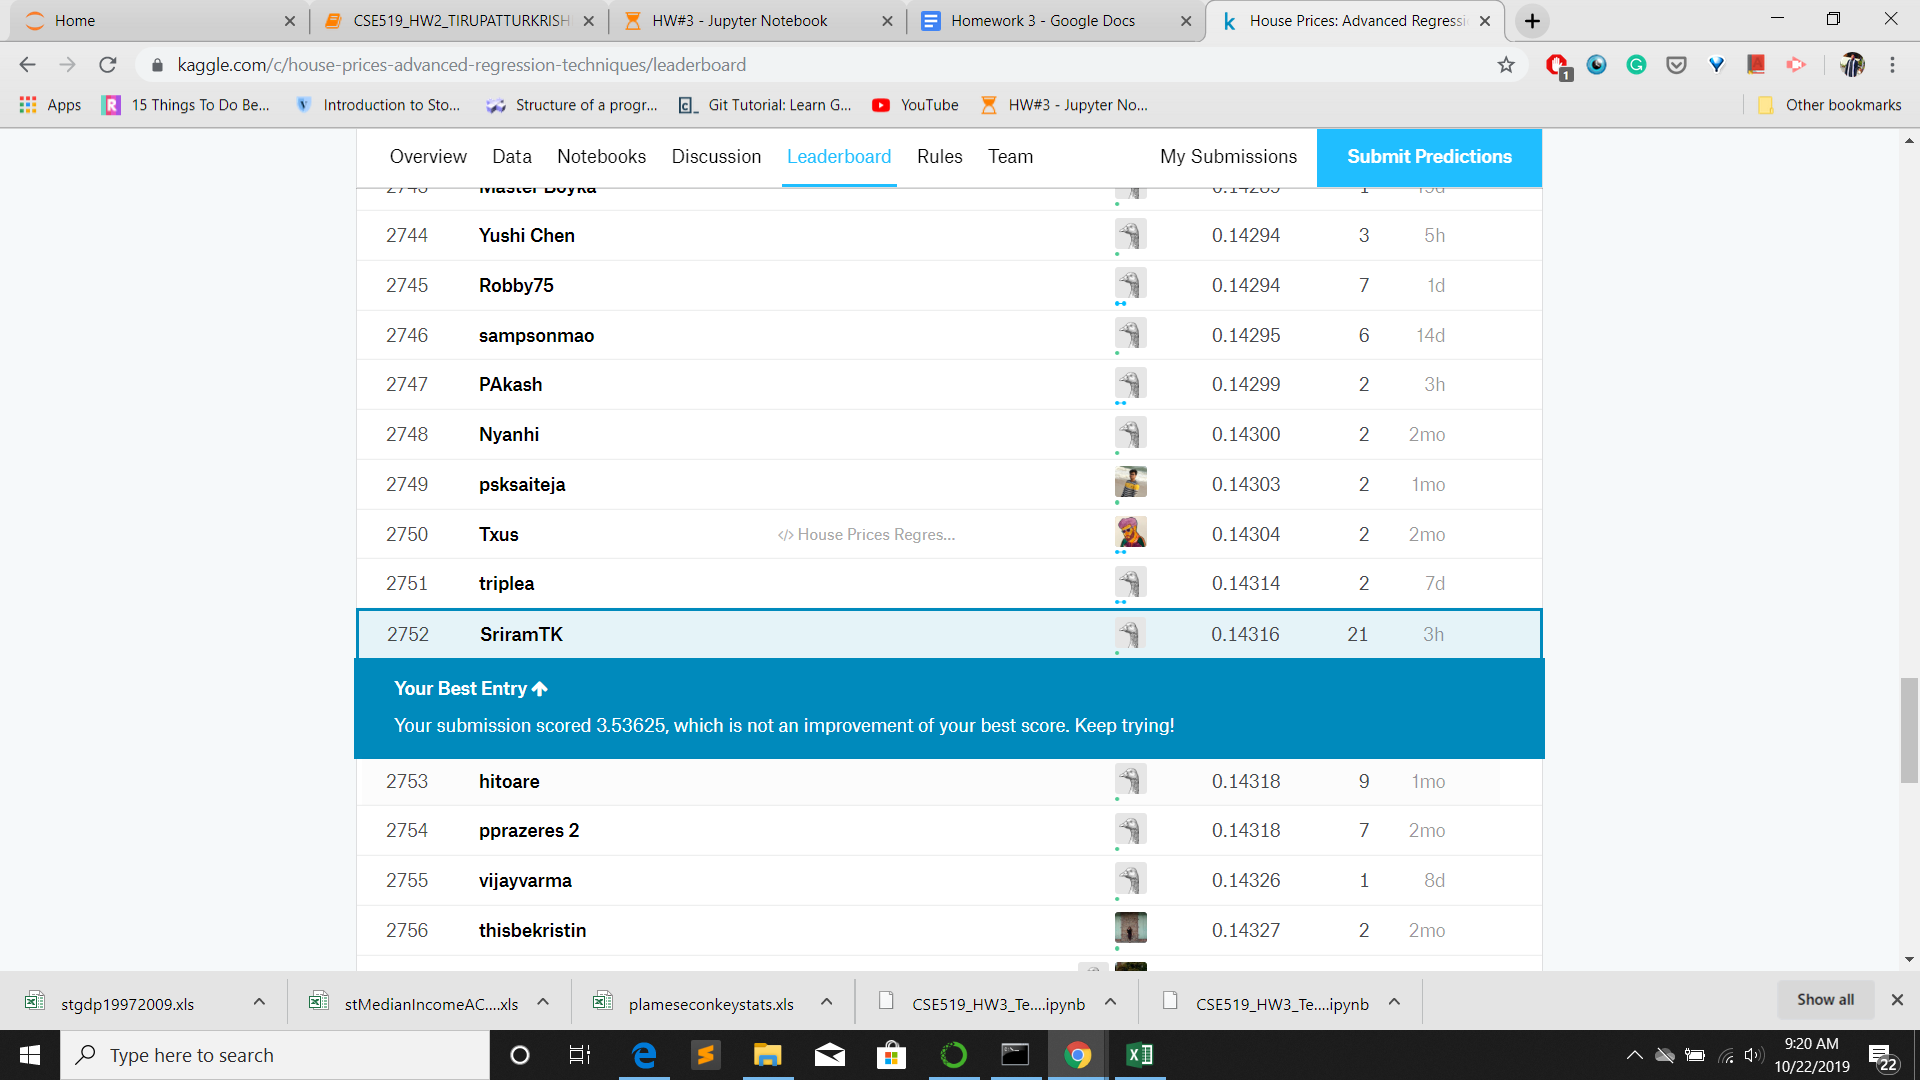